# Introduction
- description problème de recherche
- hypothèse de recherche

In [1]:
library(ggplot2);library(fitdistrplus);library(corrplot)
library(randomForest);library(car)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'fitdistrplus' was built under R version 3.6.3"Loading required package: MASS
Loading required package: survival
corrplot 0.84 loaded
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin

Loading required package: carData


In [2]:
# library(cowplot)
# library(gclus);
# library(utils);library(plyr);library(fitdistrplus)
# library(Metrics)
# slibrary(ggfortify);
# library(gridExtra);library(stats);
# library(kableExtra)
# library(MASS); library(knitr);library(ggplot2)
# library(cowplot);library(reshape2);library(dplyr)
# library(GGally);library(corrplot);library(carData)
# library(car);library(questionr);library(multcomp)
# library(dplyr);library(leaps);library(tinytex);library(latexpdf);
# library(rmarkdown);library(markdown);library(TeachingDemos)
# library(e1071);library(tidyverse);library(fitdistrplus);library(lmtest); library(randomForest);library(caret)

In [3]:
df_train = read.csv("../data/Train.csv", header=TRUE)
df_test = read.csv("../data/Test.csv", header=TRUE)

names(df_train)

[1] "MSSubClass"    "MSZoning"      "LotFrontage"   "LotArea"      
 [5] "Street"        "LotShape"      "LandContour"   "Utilities"    
 [9] "LotConfig"     "LandSlope"     "Neighborhood"  "Condition1"   
[13] "Condition2"    "BldgType"      "HouseStyle"    "OverallQual"  
[17] "OverallCond"   "YearBuilt"     "YearRemodAdd"  "RoofStyle"    
[21] "RoofMatl"      "Exterior1st"   "Exterior2nd"   "MasVnrType"   
[25] "MasVnrArea"    "ExterQual"     "ExterCond"     "Foundation"   
[29] "BsmtQual"      "BsmtCond"      "BsmtExposure"  "BsmtFinType1" 
[33] "BsmtFinSF1"    "BsmtFinType2"  "BsmtFinSF2"    "BsmtUnfSF"    
[37] "TotalBsmtSF"   "Heating"       "HeatingQC"     "CentralAir"   
[41] "Electrical"    "X1stFlrSF"     "X2ndFlrSF"     "LowQualFinSF" 
[45] "GrLivArea"     "BsmtFullBath"  "BsmtHalfBath"  "FullBath"     
[49] "HalfBath"      "BedroomAbvGr"  "KitchenAbvGr"  "KitchenQual"  
[53] "TotRmsAbvGrd"  "Functional"    "Fireplaces"    "GarageType"   
[57] "GarageYrBlt"   "GarageFinish"  "GarageCars"    "GarageArea"   
[61] "GarageQual"    "GarageCond"    "PavedDrive"    "WoodDeckSF"   
[65] "OpenPorchSF"   "EnclosedPorch" "X3SsnPorch"    "ScreenPorch"  
[69] "PoolArea"      "MiscVal"       "MoSold"        "YrSold"       
[73] "SaleType"      "SaleCondition" "SalePrice"

In [4]:
df_all <- rbind(df_train, df_test)

dim(df_train)
dim(df_test)
dim(df_all)

[1] 1095   75

[1] 365  75

[1] 1460   75

In [5]:
# affiche les 10 premières features et la target
str(df_train[,c(1:10, 75)])

'data.frame':	1095 obs. of  11 variables:
 $ MSSubClass : int  60 190 20 90 20 50 90 20 60 20 ...
 $ MSZoning   : Factor w/ 5 levels "C (all)","FV",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ LotFrontage: int  63 62 90 92 65 86 75 71 74 63 ...
 $ LotArea    : int  7875 10106 17217 12108 8450 11500 9825 9230 7472 8487 ...
 $ Street     : Factor w/ 2 levels "Grvl","Pave": 2 2 2 2 2 2 2 2 2 2 ...
 $ LotShape   : Factor w/ 4 levels "IR1","IR2","IR3",..: 4 4 4 4 4 1 4 4 1 4 ...
 $ LandContour: Factor w/ 4 levels "Bnk","HLS","Low",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Utilities  : Factor w/ 2 levels "AllPub","NoSeWa": 1 1 1 1 1 1 1 1 1 1 ...
 $ LotConfig  : Factor w/ 5 levels "Corner","CulDSac",..: 5 5 5 5 5 5 5 1 2 3 ...
 $ LandSlope  : Factor w/ 3 levels "Gtl","Mod","Sev": 1 1 1 1 1 1 1 1 1 1 ...
 $ SalePrice  : int  180000 127500 84500 118000 179000 250000 100000 146000 184000 190000 ...


In [6]:
head(df_all[,c(1:10, 75)])

MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,SalePrice
60,RL,63,7875,Pave,Reg,Lvl,AllPub,Inside,Gtl,180000
190,RL,62,10106,Pave,Reg,Lvl,AllPub,Inside,Gtl,127500
20,RL,90,17217,Pave,Reg,Lvl,AllPub,Inside,Gtl,84500
90,RL,92,12108,Pave,Reg,Lvl,AllPub,Inside,Gtl,118000
20,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,179000
50,RL,86,11500,Pave,IR1,Lvl,AllPub,Inside,Gtl,250000


In [7]:
nrow(df_train) - nrow(unique(df_train))
nrow(df_test) - nrow(unique(df_test))

[1] 0

[1] 0

In [8]:
sum(is.na(df_train)) 
sum(is.na(df_test))

[1] 0

[1] 0

---
# Analyse exploratoire
- graphes statistiques élémentaires pour les variables et paires de variables
- Cullen-Frey pour l’étude de la distribution de la variable cible.
- Décrivez vos résultats

## Compréhension de la target

summary statistics
------
min:  34900   max:  755000 
median:  163000 
mean:  180921.2 
estimated sd:  79442.5 
estimated skewness:  1.882876 
estimated kurtosis:  9.536282 

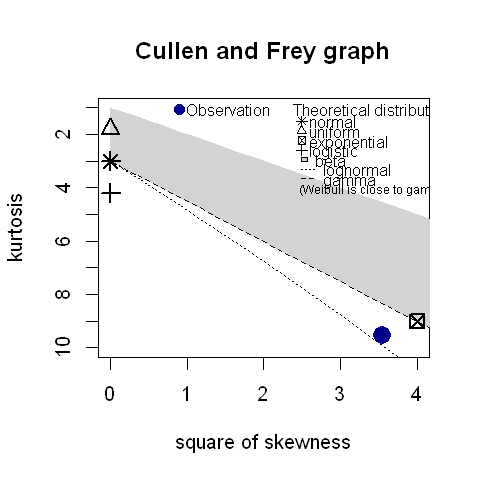

In [9]:
options(repr.plot.width = 4, repr.plot.height = 4)

descdist(df_all$SalePrice)

dddddddddddd

summary statistics
------
min:  10.46024   max:  13.53447 
median:  12.00151 
mean:  12.02405 
estimated sd:  0.3994519 
estimated skewness:  0.1213351 
estimated kurtosis:  3.809532 

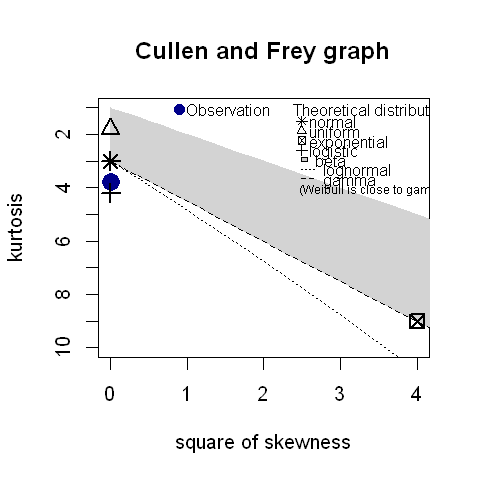

In [10]:
descdist(log(df_all$SalePrice))

La target est décalée vers la gauche (skewed), ceci pourrait s'expliquer par le fait que les prix les plus élevés ne sont pas abordables pour la plupart des gens

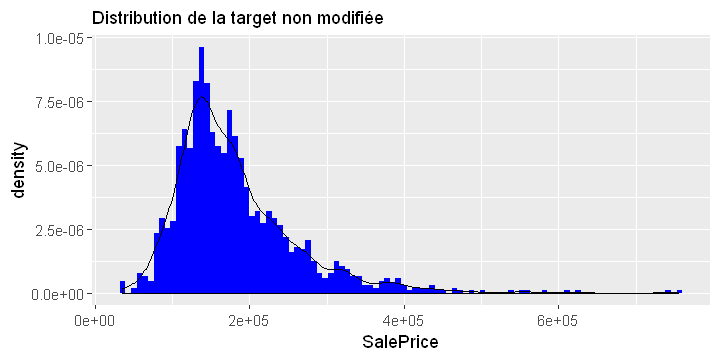

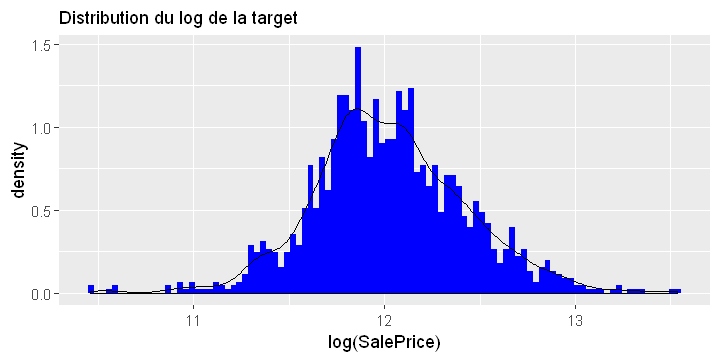

In [11]:
options(repr.plot.width = 6, repr.plot.height = 3)

ggplot(data = df_all[!is.na(df_all$SalePrice),], aes(x=SalePrice)) +
        geom_histogram(bins=100, fill="blue", aes(y = ..density..)) +
        geom_density() + labs(subtitle="Distribution de la target non modifiée")

ggplot(data=df_all[!is.na(df_all$SalePrice),], aes(x=log(SalePrice))) +
        geom_histogram(bins=100, fill="blue", aes(y = ..density..)) +
        geom_density() + labs(subtitle="Distribution du log de la target")

## Analyse de certaines features

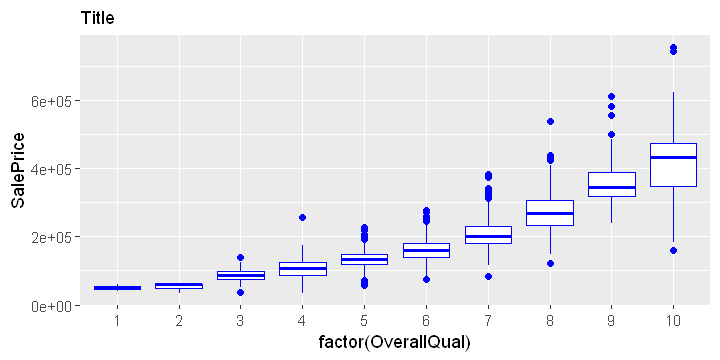

In [12]:
ggplot(data = df_all[!is.na(df_all$SalePrice),], aes(x=factor(OverallQual), y=SalePrice))+
        geom_boxplot(col='blue') + labs(subtitle="Title")

## Etudes des corrélations pour les features quantitatives
regardons dans un 1er temps les features numériques qui sont les plus fortement corrélées avec la target pour voir qu'elles sont celles qui ont le plus d'influcence.

Il y a 19 features numériques sur les 37 dont la corrélation est en valeur absolue supérieure à 0.3. Il est à noter que toute les corrélations sont positives car tous les chiffres sont positifs.

In [13]:
# index des vecteur de variables numériques
numericVars <- which(sapply(df_all, is.numeric))

# liste des noms correspondants à ces vecteurs
numericVarNames <- names(numericVars) 

# nombre
length(numericVars)

[1] 37

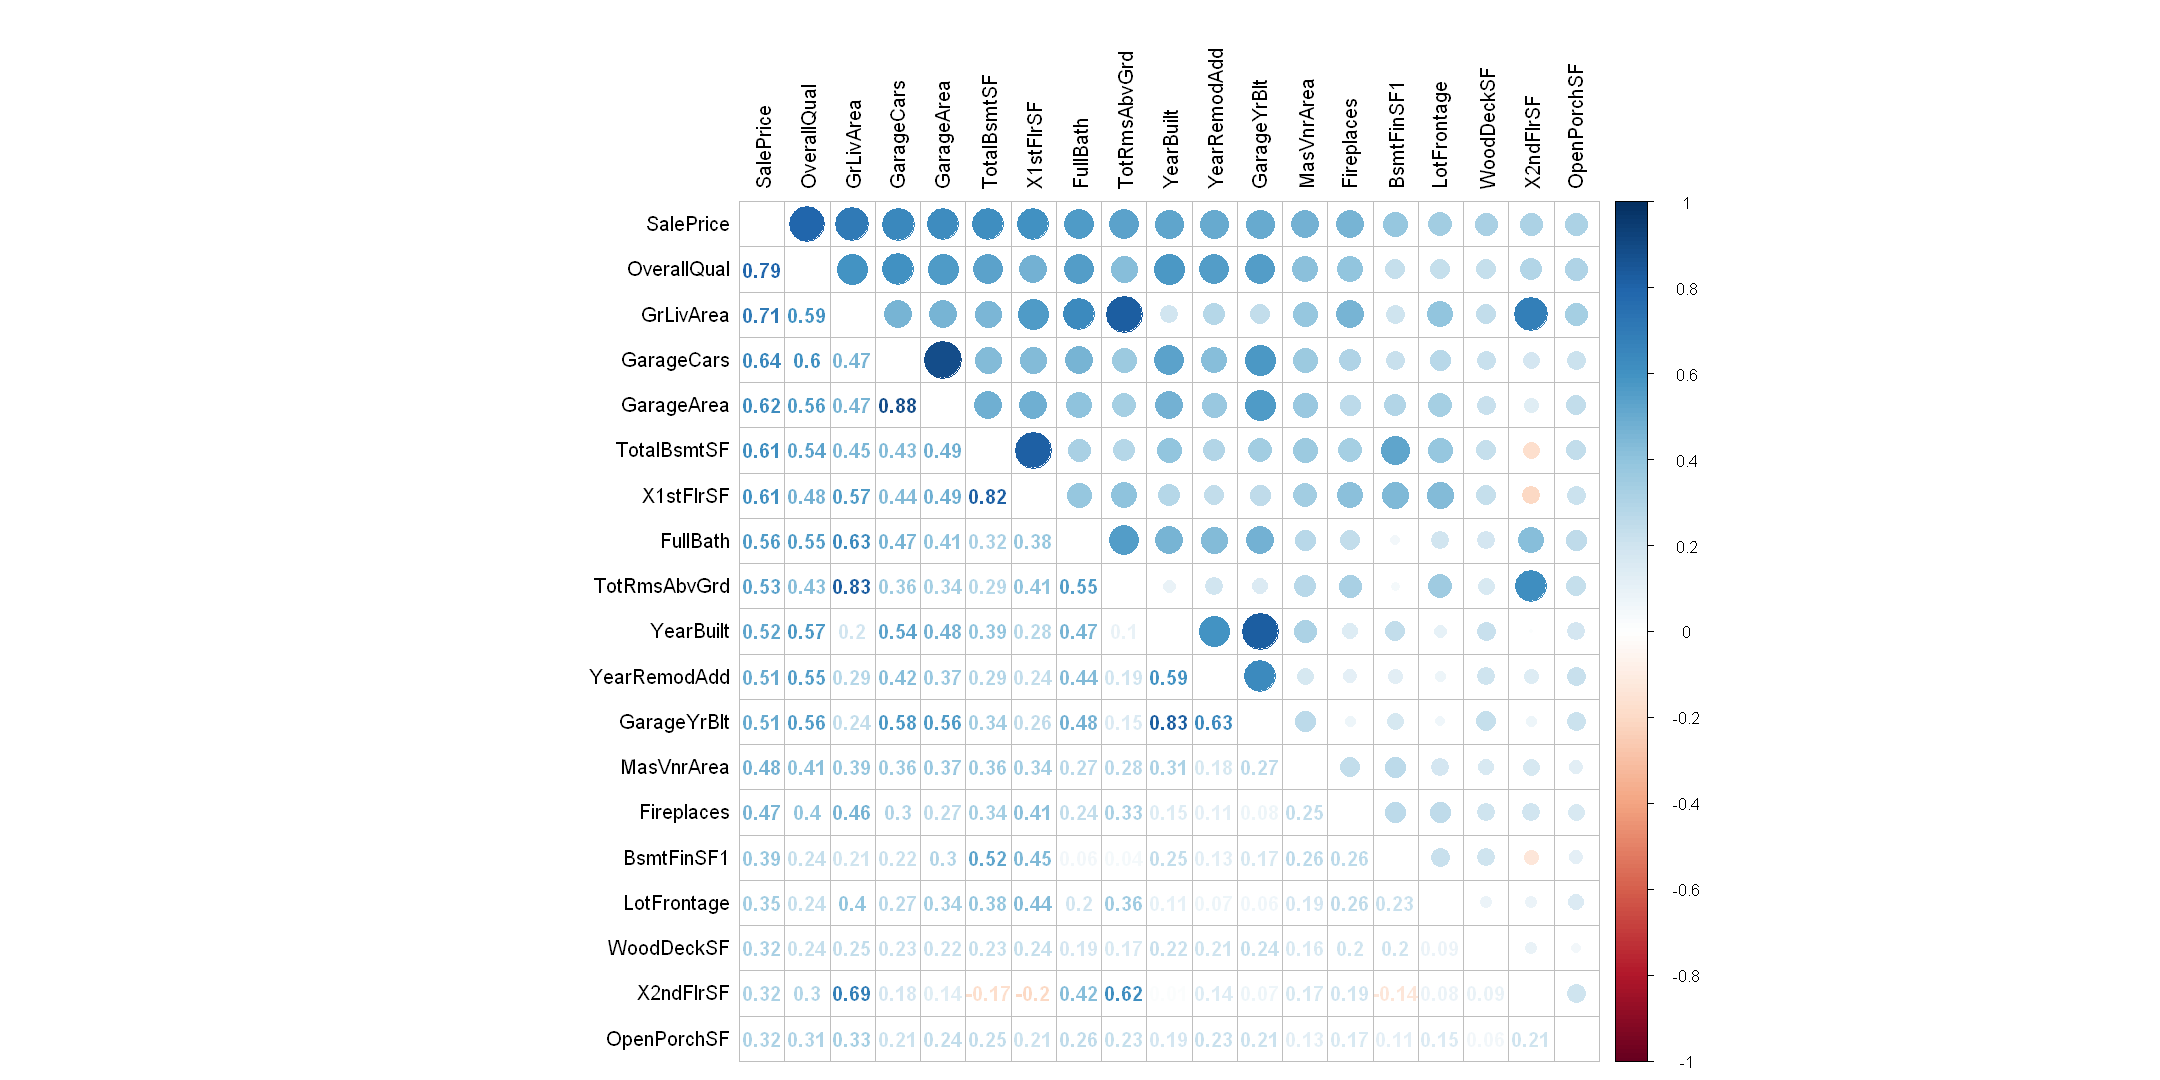

In [14]:
all_numVar <- df_all[, numericVars]

# correlations de toutes les features numériques
cor_numVar <- cor(all_numVar, use="pairwise.complete.obs") 

options(repr.plot.width = 18, repr.plot.height = 9)

# classement decroissant des corrélations avec la target
cor_sorted <- as.matrix(sort(cor_numVar[,'SalePrice'], decreasing = TRUE))

# filtre pour ne garder que les corrélations supérieurs en val. abs. à 0.3
CorHigh <- names(which(apply(cor_sorted, 1, function(x) (x > 0.3 | x < -0.3))))
cor_numVar <- cor_numVar[CorHigh, CorHigh]

# affiche le graphe
corrplot.mixed(cor_numVar, tl.col="black", tl.pos = "lt")

---
# Validité des modèles

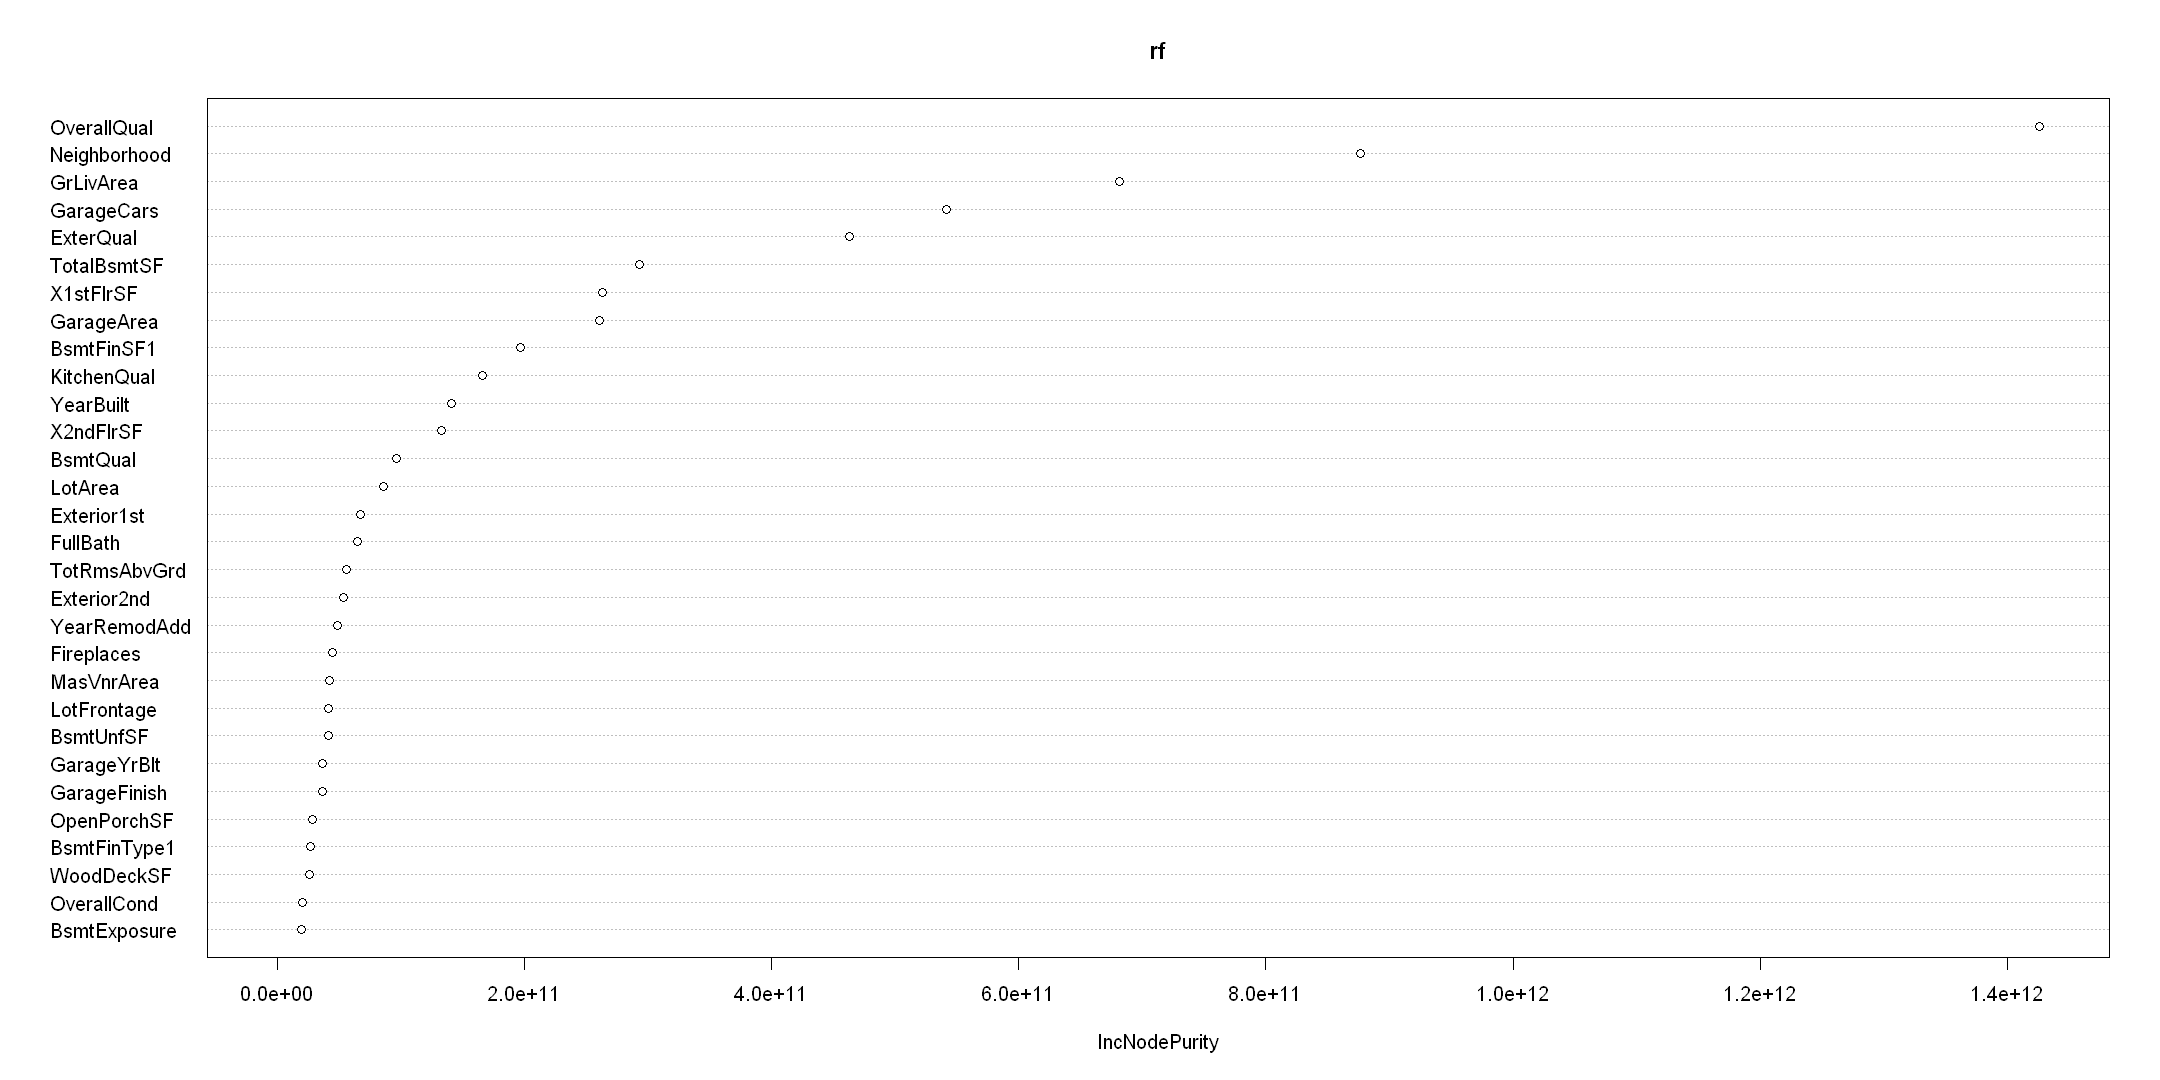

In [15]:
rf = randomForest(SalePrice~ .,data=df_train)
varImpPlot(rf)

## baseline
1er modèle avec les 7 features classées par importance selon le randomforrest

In [16]:
df_train_subset_one = (subset(df_train, select=c(OverallQual,Neighborhood,GrLivArea,GarageCars,ExterQual,TotalBsmtSF,X1stFlrSF,SalePrice)))
df_test_subset_one = (subset(df_test, select=c(OverallQual,Neighborhood,GrLivArea,GarageCars,ExterQual,TotalBsmtSF,X1stFlrSF,SalePrice)))

head(df_train_subset_one)

OverallQual,Neighborhood,GrLivArea,GarageCars,ExterQual,TotalBsmtSF,X1stFlrSF,SalePrice
7,Gilbert,1509,2,Gd,783,807,180000
5,Edwards,1355,0,TA,644,808,127500
5,Mitchel,1140,0,TA,1140,1140,84500
4,Edwards,1440,0,TA,1440,1440,118000
7,SawyerW,1349,2,TA,1349,1349,179000
7,Crawfor,2057,1,Gd,1017,1020,250000


In [17]:
df_train_one_b = df_train_subset_one[,-c(8)]
df_test_one_b = df_test_subset_one[,-c(8)]

head(df_train_one_b)

OverallQual,Neighborhood,GrLivArea,GarageCars,ExterQual,TotalBsmtSF,X1stFlrSF
7,Gilbert,1509,2,Gd,783,807
5,Edwards,1355,0,TA,644,808
5,Mitchel,1140,0,TA,1140,1140
4,Edwards,1440,0,TA,1440,1440
7,SawyerW,1349,2,TA,1349,1349
7,Crawfor,2057,1,Gd,1017,1020


In [18]:
model_baseline = lm(log(df_train_subset_one$SalePrice)~., data=df_train_one_b)
summary(model_baseline)


Call:
lm(formula = log(df_train_subset_one$SalePrice) ~ ., data = df_train_one_b)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.60311 -0.07002  0.01415  0.08761  0.50278 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.098e+01  7.337e-02 149.627  < 2e-16 ***
OverallQual          8.644e-02  6.574e-03  13.148  < 2e-16 ***
NeighborhoodBlueste -6.263e-02  1.655e-01  -0.378 0.705209    
NeighborhoodBrDale  -2.571e-01  7.085e-02  -3.629 0.000298 ***
NeighborhoodBrkSide -6.940e-02  5.169e-02  -1.342 0.179735    
NeighborhoodClearCr  1.863e-01  5.680e-02   3.280 0.001073 ** 
NeighborhoodCollgCr  7.052e-02  4.555e-02   1.548 0.121811    
NeighborhoodCrawfor  1.578e-01  5.163e-02   3.057 0.002295 ** 
NeighborhoodEdwards -1.058e-01  4.923e-02  -2.150 0.031806 *  
NeighborhoodGilbert  5.097e-02  4.905e-02   1.039 0.298958    
NeighborhoodIDOTRR  -1.951e-01  5.567e-02  -3.504 0.000478 ***
NeighborhoodMeadowV -2.043e-01  6.620e-02 

In [19]:
y_train_pred = (predict(model_baseline, newdata=df_train_one_b))
y_test_pred =(predict(model_baseline, newdata=df_test_one_b ))


RMSE_train = c(sqrt(mean((exp(y_train_pred)-df_train_subset_one$SalePrice)^2)))
RMSE_test = c(sqrt(mean((exp(y_test_pred)-df_test_subset_one$SalePrice)^2)))

print("RMSE sur le dataset de train:"); print(RMSE_train, digits=5)

[1] "RMSE sur le dataset de train:"
[1] 35196


In [20]:
print("RMSE sur le dataset de test:"); print(RMSE_test, digits=5)

[1] "RMSE sur le dataset de test:"
[1] 29458


In [21]:
summary(df_all$SalePrice)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  34900  129975  163000  180921  214000  755000 

## 2nd modèle - suppression des outliers

In [22]:
outlierTest(model_baseline)

      rstudent unadjusted p-value Bonferonni p
720 -12.224774         3.0199e-32   3.3038e-29
819  -7.381171         3.1634e-13   3.4607e-10
743  -5.350888         1.0721e-07   1.1729e-04
661  -4.283613         2.0057e-05   2.1942e-02
814  -4.102213         4.4053e-05   4.8194e-02

In [23]:
df_train_subset_two = df_train_subset_one[-c(720,819,743,661,814),]
df_train_subset_two_b = df_train_subset_two[,-c(8)]

df_test_subset_two = df_test_subset_one[-c(720,819,743,661,814),]
df_test_subset_two_b = df_test_subset_two[,-c(8)]

dim(df_train_subset_two)
dim(df_train_subset_two_b)

[1] 1090    8

[1] 1090    7

In [24]:
model_outlier = lm(log(df_train_subset_two$SalePrice)~., data=df_train_subset_two_b)
summary(model_outlier)


Call:
lm(formula = log(df_train_subset_two$SalePrice) ~ ., data = df_train_subset_two_b)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.66219 -0.06343  0.00992  0.08528  0.46549 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.096e+01  6.377e-02 171.804  < 2e-16 ***
OverallQual          8.144e-02  5.740e-03  14.187  < 2e-16 ***
NeighborhoodBlueste -4.093e-02  1.434e-01  -0.286 0.775304    
NeighborhoodBrDale  -2.122e-01  6.144e-02  -3.453 0.000576 ***
NeighborhoodBrkSide -4.454e-02  4.481e-02  -0.994 0.320513    
NeighborhoodClearCr  1.634e-01  4.922e-02   3.320 0.000930 ***
NeighborhoodCollgCr  7.058e-02  3.945e-02   1.789 0.073936 .  
NeighborhoodCrawfor  1.467e-01  4.473e-02   3.280 0.001072 ** 
NeighborhoodEdwards -5.267e-02  4.279e-02  -1.231 0.218623    
NeighborhoodGilbert  6.565e-02  4.250e-02   1.545 0.122660    
NeighborhoodIDOTRR  -1.432e-01  4.849e-02  -2.953 0.003221 ** 
NeighborhoodMeadowV -1.639e-01  5.7

In [25]:
y_train_pred = (predict(model_outlier, newdata=df_train_subset_two_b))
y_test_pred =(predict(model_outlier, newdata=df_test_subset_two_b ))


RMSE_train = c(sqrt(mean((exp(y_train_pred)-df_train_subset_two$SalePrice)^2)))
RMSE_test = c(sqrt(mean((exp(y_test_pred)-df_test_subset_two$SalePrice)^2)))

print("RMSE sur le dataset de train:"); print(RMSE_train, digits=5)

[1] "RMSE sur le dataset de train:"
[1] 25309


In [26]:
print("RMSE sur le dataset de test:"); print(RMSE_test, digits=5)

[1] "RMSE sur le dataset de test:"
[1] 26977


## selection de features


In [27]:
model_all = lm(log(df_train$SalePrice)~.,data=df_train)
print(Anova(model_all))

Note: model has aliased coefficients
      sums of squares computed by model comparison


Anova Table (Type II tests)

Response: log(df_train$SalePrice)
              Sum Sq  Df F value    Pr(>F)    
MSSubClass    0.0075   1  0.6649 0.4150439    
MSZoning      0.3238   4  7.1844 1.081e-05 ***
LotFrontage   0.0033   1  0.2935 0.5881476    
LotArea       0.1833   1 16.2716 5.969e-05 ***
Street        0.0374   1  3.3167 0.0689219 .  
LotShape      0.0370   3  1.0937 0.3508843    
LandContour   0.0821   3  2.4282 0.0641023 .  
Utilities     0.0307   1  2.7241 0.0992064 .  
LotConfig     0.1464   4  3.2475 0.0117286 *  
LandSlope     0.1015   2  4.5053 0.0113080 *  
Neighborhood  1.6444  24  6.0815 < 2.2e-16 ***
Condition1    0.3981   8  4.4169 2.960e-05 ***
Condition2    0.9718   5 17.2515 2.642e-16 ***
BldgType      0.0442   4  0.9799 0.4175675    
HouseStyle    0.1031   7  1.3071 0.2435720    
OverallQual   0.5397   1 47.9053 8.660e-12 ***
OverallCond   0.6932   1 61.5302 1.271e-14 ***
YearBuilt     0.1452   1 12.8870 0.0003493 ***
YearRemodAdd  0.0477   1  4.2346 0.0399041 *

    
   qqqqqqqqqqqqqqqqqqqqqq

In [28]:
DatAnova = (subset(df_train, select=c(MSZoning,LotArea,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,OverallQual,
                                      OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,BsmtFullBath,HalfBath,KitchenQual,
                                      Functional,Fireplaces,GarageCars,GarageArea,WoodDeckSF,X3SsnPorch,ScreenPorch,
                                      SaleCondition,SalePrice)))

mod_Anova = lm(log(DatAnova$SalePrice)~., data=DatAnova)

In [29]:
print(anova(model_all))

Analysis of Variance Table

Response: log(df_train$SalePrice)
               Df Sum Sq Mean Sq   F value    Pr(>F)    
MSSubClass      1  0.872  0.8722   77.4126 < 2.2e-16 ***
MSZoning        4 29.336  7.3340  650.9481 < 2.2e-16 ***
LotFrontage     1 10.582 10.5821  939.2406 < 2.2e-16 ***
LotArea         1  2.824  2.8241  250.6626 < 2.2e-16 ***
Street          1  0.529  0.5294   46.9874 1.350e-11 ***
LotShape        3  5.377  1.7925  159.0977 < 2.2e-16 ***
LandContour     3  2.132  0.7106   63.0707 < 2.2e-16 ***
Utilities       1  0.123  0.1232   10.9333 0.0009831 ***
LotConfig       4  1.590  0.3975   35.2824 < 2.2e-16 ***
LandSlope       2  1.524  0.7619   67.6274 < 2.2e-16 ***
Neighborhood   24 57.860  2.4108  213.9794 < 2.2e-16 ***
Condition1      8  1.573  0.1966   17.4528 < 2.2e-16 ***
Condition2      5  0.096  0.0192    1.7051 0.1308130    
BldgType        4  2.128  0.5321   47.2253 < 2.2e-16 ***
HouseStyle      7  1.499  0.2142   19.0124 < 2.2e-16 ***
OverallQual     1 18.090 1

In [30]:
Dat_anova = (subset(df_train, select=-c(Condition2,ExterCond,Heating,HeatingQC,Electrical,LowQualFinSF, BsmtHalfBath,
                                               FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,GarageType,GarageFinish,GarageQual,
                                               GarageCond,PavedDrive,OpenPorchSF,EnclosedPorch,MiscVal,MoSold,YrSold)))

mod_anova = lm(log(Dat_anova$SalePrice)~., data=Dat_anova)

Modèle par la méthode 'forward'

In [31]:
names(df_train)

[1] "MSSubClass"    "MSZoning"      "LotFrontage"   "LotArea"      
 [5] "Street"        "LotShape"      "LandContour"   "Utilities"    
 [9] "LotConfig"     "LandSlope"     "Neighborhood"  "Condition1"   
[13] "Condition2"    "BldgType"      "HouseStyle"    "OverallQual"  
[17] "OverallCond"   "YearBuilt"     "YearRemodAdd"  "RoofStyle"    
[21] "RoofMatl"      "Exterior1st"   "Exterior2nd"   "MasVnrType"   
[25] "MasVnrArea"    "ExterQual"     "ExterCond"     "Foundation"   
[29] "BsmtQual"      "BsmtCond"      "BsmtExposure"  "BsmtFinType1" 
[33] "BsmtFinSF1"    "BsmtFinType2"  "BsmtFinSF2"    "BsmtUnfSF"    
[37] "TotalBsmtSF"   "Heating"       "HeatingQC"     "CentralAir"   
[41] "Electrical"    "X1stFlrSF"     "X2ndFlrSF"     "LowQualFinSF" 
[45] "GrLivArea"     "BsmtFullBath"  "BsmtHalfBath"  "FullBath"     
[49] "HalfBath"      "BedroomAbvGr"  "KitchenAbvGr"  "KitchenQual"  
[53] "TotRmsAbvGrd"  "Functional"    "Fireplaces"    "GarageType"   
[57] "GarageYrBlt"   "GarageFinish"  "GarageCars"    "GarageArea"   
[61] "GarageQual"    "GarageCond"    "PavedDrive"    "WoodDeckSF"   
[65] "OpenPorchSF"   "EnclosedPorch" "X3SsnPorch"    "ScreenPorch"  
[69] "PoolArea"      "MiscVal"       "MoSold"        "YrSold"       
[73] "SaleType"      "SaleCondition" "SalePrice"

In [34]:
mod_intercept = lm(log(df_train$SalePrice)~1,data=df_train)
 
mod_forward = step(mod_intercept,log(df_train$SalePrice) ~ MSSubClass+MSZoning+LotFrontage+LotArea+Street+LotShape+LandContour+
                   Utilities+LotConfig+LandSlope+Neighborhood+Condition1+Condition2+BldgType+HouseStyle+OverallQual+OverallCond+
                   YearBuilt+YearRemodAdd+RoofStyle+RoofMatl+Exterior1st+Exterior2nd+MasVnrType+MasVnrArea+ExterQual+ExterCond+
                   Foundation+BsmtQual+BsmtCond+BsmtExposure+BsmtFinType1+BsmtFinSF1+BsmtFinType2+BsmtFinSF2+BsmtUnfSF+TotalBsmtSF+
                   Heating+HeatingQC+CentralAir+Electrical+X1stFlrSF+X2ndFlrSF+LowQualFinSF+GrLivArea+BsmtFullBath+BsmtHalfBath+
                   FullBath+HalfBath+BedroomAbvGr+KitchenAbvGr+KitchenQual+TotRmsAbvGrd+Functional+Fireplaces+GarageType+
                   GarageYrBlt+GarageFinish+GarageCars+GarageArea+GarageQual+GarageCond+PavedDrive+WoodDeckSF+OpenPorchSF+
                   EnclosedPorch+X3SsnPorch+ScreenPorch+PoolArea+MiscVal+MoSold+YrSold+SaleType+SaleCondition,
                   data=df_train, trace=F, direction=c('forward'))
mod_forward


Call:
lm(formula = log(df_train$SalePrice) ~ OverallQual + Neighborhood + 
    GrLivArea + GarageCars + OverallCond + BsmtFullBath + RoofMatl + 
    TotalBsmtSF + YearBuilt + Condition2 + BldgType + BsmtFinSF1 + 
    SaleCondition + LotArea + KitchenQual + MSZoning + Functional + 
    Exterior1st + Condition1 + WoodDeckSF + ScreenPorch + Fireplaces + 
    YearRemodAdd + SaleType + BsmtQual + X3SsnPorch + BsmtExposure + 
    Street + GarageArea + HalfBath + HeatingQC + EnclosedPorch + 
    PoolArea + LandSlope + LandContour + Heating + LowQualFinSF + 
    CentralAir + LotConfig, data = df_train)

Coefficients:
         (Intercept)           OverallQual   NeighborhoodBlueste  
           2.785e+00             4.655e-02            -9.074e-03  
  NeighborhoodBrDale   NeighborhoodBrkSide   NeighborhoodClearCr  
          -8.460e-02            -4.531e-03            -6.008e-03  
 NeighborhoodCollgCr   NeighborhoodCrawfor   NeighborhoodEdwards  
          -3.813e-02             8.823e-02     

In [35]:
mod_both = step(mod_intercept,log(df_train$SalePrice) ~ MSSubClass+MSZoning+LotFrontage+LotArea+Street+LotShape+LandContour+
                   Utilities+LotConfig+LandSlope+Neighborhood+Condition1+Condition2+BldgType+HouseStyle+OverallQual+OverallCond+
                   YearBuilt+YearRemodAdd+RoofStyle+RoofMatl+Exterior1st+Exterior2nd+MasVnrType+MasVnrArea+ExterQual+ExterCond+
                   Foundation+BsmtQual+BsmtCond+BsmtExposure+BsmtFinType1+BsmtFinSF1+BsmtFinType2+BsmtFinSF2+BsmtUnfSF+TotalBsmtSF+
                   Heating+HeatingQC+CentralAir+Electrical+X1stFlrSF+X2ndFlrSF+LowQualFinSF+GrLivArea+BsmtFullBath+BsmtHalfBath+
                   FullBath+HalfBath+BedroomAbvGr+KitchenAbvGr+KitchenQual+TotRmsAbvGrd+Functional+Fireplaces+GarageType+
                   GarageYrBlt+GarageFinish+GarageCars+GarageArea+GarageQual+GarageCond+PavedDrive+WoodDeckSF+OpenPorchSF+
                   EnclosedPorch+X3SsnPorch+ScreenPorch+PoolArea+MiscVal+MoSold+YrSold+SaleType+SaleCondition,
                   data=df_train, trace=F, direction=c('both'))
mod_both


Call:
lm(formula = log(df_train$SalePrice) ~ OverallQual + Neighborhood + 
    GrLivArea + GarageCars + OverallCond + BsmtFullBath + RoofMatl + 
    TotalBsmtSF + YearBuilt + Condition2 + BldgType + BsmtFinSF1 + 
    SaleCondition + LotArea + KitchenQual + MSZoning + Functional + 
    Exterior1st + Condition1 + WoodDeckSF + ScreenPorch + Fireplaces + 
    YearRemodAdd + SaleType + BsmtQual + X3SsnPorch + BsmtExposure + 
    Street + GarageArea + HalfBath + HeatingQC + EnclosedPorch + 
    PoolArea + LandSlope + LandContour + Heating + LowQualFinSF + 
    CentralAir + LotConfig, data = df_train)

Coefficients:
         (Intercept)           OverallQual   NeighborhoodBlueste  
           2.785e+00             4.655e-02            -9.074e-03  
  NeighborhoodBrDale   NeighborhoodBrkSide   NeighborhoodClearCr  
          -8.460e-02            -4.531e-03            -6.008e-03  
 NeighborhoodCollgCr   NeighborhoodCrawfor   NeighborhoodEdwards  
          -3.813e-02             8.823e-02     

In [36]:
mod_backward=step(model_all,~.,trace=F,direction=c("backward"))


Model final par extraction de l’AIC


In [37]:
AIC = c(extractAIC(model_all)[2],extractAIC(mod_Anova)[2],extractAIC(mod_anova)[2],extractAIC(mod_both)[2],extractAIC(mod_backward)[2],extractAIC(mod_forward)[2])
names(AIC) = c('model_all','mod_Anova','mod_anova','mod_both','mod_backward','mod_forward')
AIC

model_all    mod_Anova    mod_anova     mod_both mod_backward  mod_forward 
   -4716.172    -4175.193    -4641.144    -4795.989    -4793.403    -4795.989

In [38]:
outlierTest(mod_Anova)

      rstudent unadjusted p-value Bonferonni p
743  -5.852151         6.5702e-09   7.1221e-06
814  -4.923758         9.9255e-07   1.0759e-03
1079 -4.159650         3.4608e-05   3.7516e-02

In [39]:
train_sansOutliers = DatAnova[-c(743,814,1079),]

In [40]:
mod_final = lm(log(DatAnova$SalePrice)~., data=DatAnova)

In [45]:
y_train_pred = (predict(mod_final, newdata=train_sansOutliers[,-c(25)]))
#y_test_pred =(predict(mod_final, newdata=df_test_subset_two_b ))


RMSE_train = c(sqrt(mean((exp(y_train_pred)-df_train_subset_two$SalePrice)^2)))
#RMSE_test = c(sqrt(mean((exp(y_test_pred)-df_test_subset_two$SalePrice)^2)))

print("RMSE sur le dataset de train:"); print(RMSE_train, digits=5)

Warning message in exp(y_train_pred) - df_train_subset_two$SalePrice:
"la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court"

[1] "RMSE sur le dataset de train:"
[1] 72237


In [43]:
dim(train_sansOutliers)

[1] 1092   25

---
# Modèles finale et comparaison des RMSE

---
# Discussion
- ouverture à d'autres modèles tree-based & ensembliste, NN
- ici si besoin d'explicabilité reg lin intéressante mais nécessite plus de feat eng.
- pour améliorer: plus de data, plus de feat eng., comparer de nouveaux modèles...